## June 23 Testing

In [187]:
import time
import pickle
import importlib
import numpy as np
from serial.tools import list_ports
import matplotlib.pyplot as plt 

import LabBench 
import FastDAC as FD
import PIDFastDAC as PFD


# nice command to list all the available serial ports
! python -m serial.tools.list_ports -v

COM1                
    desc: Communications Port (COM1)
    hwid: ACPI\PNP0501\0
COM3                
3 ports found
    desc: USB Serial Port (COM3)
    hwid: USB VID:PID=0403:6014 SER=FT4RD3I0A
COM4                
    desc: USB Serial Port (COM4)
    hwid: USB VID:PID=0403:6014 SER=FT6DF739A


## Connnection

In [193]:
PID_fd = PFD.PIDFastDAC("COM4", 1750000, timeout=10, verbose=False)
PID_fd.limit = [-2000, 1000]
# fd = FD.FastDAC("COM4", 1750000, timeout=10, verbose=False)

DAC-ADC_AD7734-AD5764_UNIT5_PIDTEST


## Set Process Direction

In [194]:
PID_fd.dir = 0  # 0 is reverse, 1 is direct

## PID Configurations

In [217]:
PID_fd.kp = 0.05
PID_fd.ki = 0.7
PID_fd.kd = 0.0005
PID_fd.setp = 3000

## Start

In [218]:
PID_fd.START_PID()

Stop the PID algorithm, return DACO to 0 V.

In [227]:
PID_fd.STOP_PID()
## Ramp DAC0 back to 0
PID_fd.RAMP_SMART()

'RAMP_FINISHED'

In [78]:
PID_fd.GET_ADC(0)

'2638.5498'

In [39]:
PID_fd.RAMP_SMART(channel=0, setPoint=-5, rampRate=1000)

'RAMP_FINISHED'

RAMP_FINISHED


'RAMP_FINISHED'

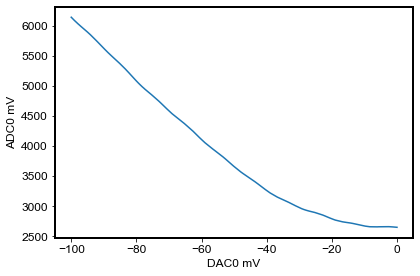

In [110]:
readings = PID_fd.RAMP_AND_READ(steps=2000, rampRanges={0:[0, -100]})
# LabBench.plot_readings(readings, sampling_period=1/2538.0, xlabel="Time [mS]",separate=True)
v_range = np.linspace(0, -100, 2000)
plt.plot(v_range, readings[0])
plt.xlabel("DAC0 mV")
plt.ylabel("ADC0 mV")
# LabBench.plot_readings(readings, xlabel="Samples",separate=True)
PID_fd.RAMP_SMART()

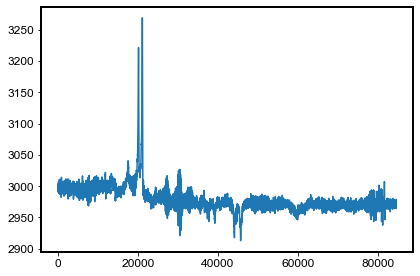